# Importing Libraries

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
%run "Stock Data.ipynb".ipynb
%run "Binance API.ipynb".ipynb
%run "RiskMetrics.ipynb".ipynb
%run "PnL Computation.ipynb".ipynb

# Importing Data

## Tickers

In [6]:
binance_api_key='E90xR7UnO2oeP3lrgC50zkqUuAqyyXs4uSlAGcqIVO9n90ELrFI4gfVI2HGGxxCj'
binance_api_secret='Inls2xYl9FqPi0zlIrucfxG81drx7w6Pv6SzYFxMNoAcwDjlCKug7zUM9zB3lF9h'
Binance=BinanceAPI(binance_api_key,binance_api_secret)

In [7]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [9]:
start_date=datetime.datetime(2023,12,1)
enddate=start_date+datetime.timedelta(500)

In [10]:
quantities_api=Binance.binance_api.user_asset()
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [11]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [12]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
price=get_trade_in_usdt(trade_history)

In [13]:
book_cost=get_book_cost(price)
realized_pnl,profit_and_loss=get_pnl(book_cost,price)
historical_positions=get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

In [14]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()

In [15]:
dic={}
for key in profit_and_loss:
    dic[key]=profit_and_loss[key].to_dict()

In [16]:
realized_pnl_time=pd.DataFrame(dic).sort_index().ffill().fillna(0)
realized_pnl_time.index=pd.to_datetime(realized_pnl_time.index).round(freq='d')
realized_pnl_time=realized_pnl_time.groupby(realized_pnl_time.index).sum()

In [17]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:75].to_list()

In [18]:
holding=Binance.get_inventory()

In [19]:
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.sort_values(ascending=False,by='Price in USDT')

,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL
Total,2184.935036,4017.022725,1.0001,-131.886217,1832.09,1700.203783
OMUSDT,526.319895,2054.574073,0.5115,0.000000,1528.25,1528.250000
BTCUSDT,601.021649,893.213725,0.2224,3.537078,292.19,295.727078
SOLUSDT,281.200518,406.931908,0.1013,0.000000,125.73,125.730000
JASMYUSDT,387.458505,302.424199,0.0753,0.000000,-85.03,-85.030000
ETHUSDT,250.747339,212.723922,0.0530,0.000000,-38.02,-38.020000
TRXUSDT,76.868953,117.027131,0.0291,-10.723889,40.16,29.436111
BBUSDT,60.176053,28.998278,0.0072,-39.733101,-31.18,-70.913101
BNBUSDT,1.142121,1.129487,0.0003,-10.606040,-0.01,-10.616040
PEPEUSDT,0.000004,0.000003,0.0000,-38.521986,-0.00,-38.521986


In [20]:
data1=Binance.get_price(tickers,start_date)
data2=Binance.get_price(tickers,enddate)
data=data1.combine_first(data2)
data.index=pd.to_datetime(data.index)
#data=data.dropna(axis=1)
n=len(data.columns)
data=data.sort_index()

In [21]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [22]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [23]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [25]:
position=pd.read_excel('Positions.xlsx',index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')

positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [26]:
quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx')

quantities_tickers=list(quantities.columns)

In [27]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])

In [28]:
price_pnl.index=pd.to_datetime(price_pnl.index)
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()
for col in quantities:
    
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost.iloc[-1][col])

pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum()[0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_10388\1175112299.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum()[0]


In [29]:
pnl_history['Total']-pnl_history['Total'].shift(1)

2024-09-23           NaN
2024-09-24     23.503339
2024-09-25     -7.470131
2024-09-26     85.699217
2024-09-27     16.519121
                 ...    
2025-01-23    -13.579569
2025-01-24    -64.480882
2025-01-25    260.437294
2025-01-26    242.122985
2025-01-27    -48.035452
Name: Total, Length: 127, dtype: float64

In [30]:
pnl_history['Total']

2024-09-23    -378.365173
2024-09-24    -354.861834
2024-09-25    -362.331965
2024-09-26    -276.632747
2024-09-27    -260.113627
                 ...     
2025-01-23    1497.586442
2025-01-24    1433.105561
2025-01-25    1693.542854
2025-01-26    1935.665840
2025-01-27    1887.630388
Name: Total, Length: 127, dtype: float64

In [31]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [32]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [33]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [34]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change())


LDUMAUSDT not retrieved
Total not retrieved


C:\Users\Admin\AppData\Local\Temp\ipykernel_10388\974280261.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  binance_data=np.log(1+binance_data.pct_change())


In [35]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [36]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [37]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

<Axes: >

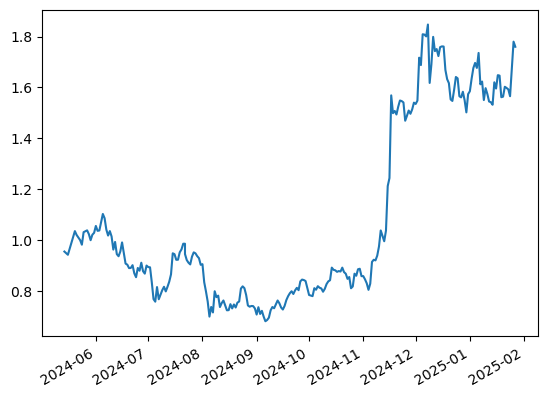

In [38]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()

## Ex ante data

In [40]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [43]:
historical_risk=RiskAnalysis(returns_to_use)
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [44]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [47]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash[0]]-0.00},
                                                                              
                                                                              {'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
OMUSDT,0.4162
XRPUSDT,0.2100
BNBUSDT,0.1871
SUIUSDT,0.0588
RAYUSDT,0.0415
DEXEUSDT,0.0364
PEPEUSDT,0.0329
AAVEUSDT,0.0168
TRXUSDT,0.0005
ENSUSDT,0.0000


In [48]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.30}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory

,Optimal Weights
OMUSDT,0.384431
BTCUSDT,0.300000
XRPUSDT,0.154680
BNBUSDT,0.059979
SUIUSDT,0.042067
DEXEUSDT,0.029762
RAYUSDT,0.029081


### Current results

In [50]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

In [51]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio")#,constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit[0]]-0.40}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
BTCUSDT,0.443006
OMUSDT,0.427307
TRXUSDT,0.129687


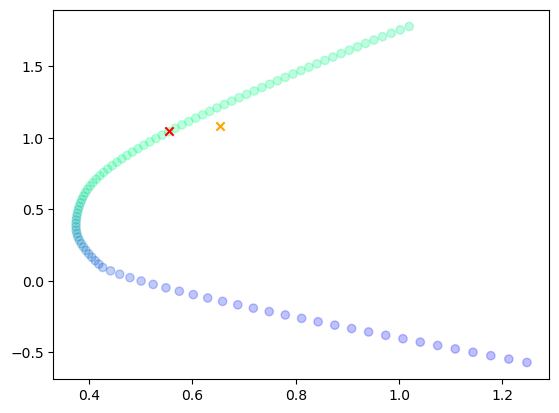

In [52]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')

## Real Portfolio vs Optimal

In [54]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison['Weights']=current_holding_comparison['Weights'].round(7)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2054.574073,0.511467,0.427307,0.084160
BTCUSDT,893.213725,0.222357,0.443006,-0.220649
SOLUSDT,406.931908,0.101302,0.000000,0.000000
JASMYUSDT,302.424199,0.075286,0.000000,0.000000
ETHUSDT,212.723922,0.052956,0.000000,0.000000
TRXUSDT,117.027131,0.029133,0.129687,-0.100554
BBUSDT,28.998278,0.007219,0.000000,0.000000
BNBUSDT,1.129487,0.000281,0.000000,0.000000
PEPEUSDT,0.000003,0.000000,0.000000,0.000000


In [55]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,inventory],axis=1)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison['Weights']=historical_comparison['Weights'].round(7)
historical_comparison=historical_comparison.fillna(0)
historical_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2054.574073,0.511467,0.384431,0.127036
BTCUSDT,893.213725,0.222357,0.300000,-0.077643
SOLUSDT,406.931908,0.101302,0.000000,0.000000
JASMYUSDT,302.424199,0.075286,0.000000,0.000000
ETHUSDT,212.723922,0.052956,0.000000,0.000000
TRXUSDT,117.027131,0.029133,0.000000,0.000000
BBUSDT,28.998278,0.007219,0.000000,0.000000
BNBUSDT,1.129487,0.000281,0.059979,-0.059698
PEPEUSDT,0.000003,0.000000,0.000000,0.000000
XRPUSDT,0.000000,0.000000,0.154680,0.000000


# Risk Reward Analysis

In [57]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [58]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

<Axes: >

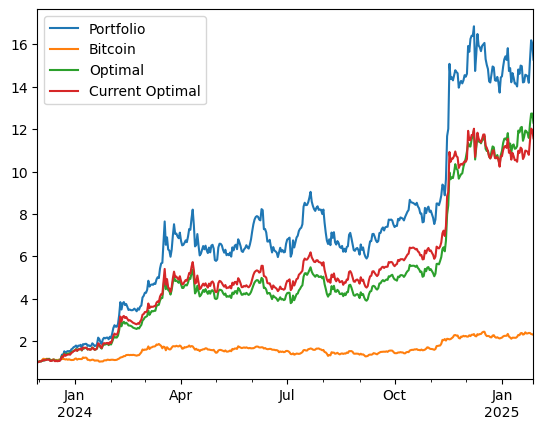

In [59]:
(1+portfolio_perf.loc[:]).cumprod().plot()

In [60]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

<Axes: >

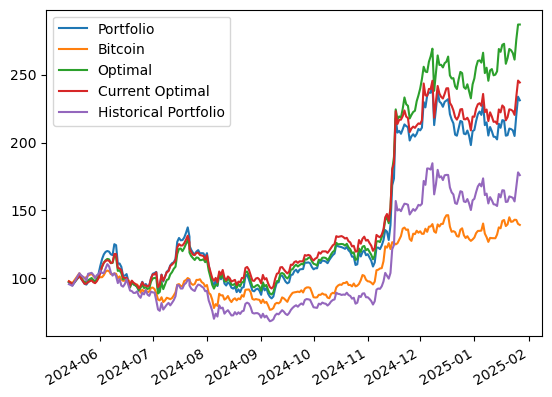

In [61]:
((1+current_perf).cumprod()*100).plot()

In [62]:
((1+current_perf).cumprod()*100).iloc[-10:]

,Portfolio,Bitcoin,Optimal,Current Optimal,Historical Portfolio
2025-01-18,216.078530,142.893805,272.750554,225.956592,164.645552
2025-01-19,205.026163,138.417370,258.007605,216.351372,156.174667
2025-01-20,205.403820,139.679830,262.217597,218.689776,156.395672
2025-01-21,210.265537,144.886575,268.953174,224.475343,160.268527
2025-01-22,209.881332,141.521058,267.994385,224.100373,159.809659
2025-01-23,208.984997,141.798733,265.913501,223.226362,159.252001
2025-01-24,204.796806,143.102976,261.083592,220.350092,156.577799
2025-01-25,220.174031,142.934147,275.837515,233.827878,167.492235
2025-01-26,233.753117,140.002047,286.950490,245.639568,177.981837
2025-01-27,231.096656,139.267274,286.950764,244.248128,175.966487


## Volatilities

In [64]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.618998
 dtype: float64,
 0.6197064619392834)

In [65]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.652911
 dtype: float64,
 0.6529113321177513)

In [66]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.745986
Bitcoin            0.427771
Optimal            0.619706
Current Optimal    0.634887
dtype: float64

In [67]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.4487820404870397

In [68]:
days=120
current_perf['Historical Portfolio'].iloc[-days:].mean()*252/(current_perf['Historical Portfolio'].iloc[-days:].std()*np.sqrt(252))

2.601284571476652

In [69]:
current_risk.performance(current_weights)/current_risk.variance(current_weights)

1.6618827769289688

## Risk Contribution

In [71]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,0.085643,0.059979,0.006206,0.020602,0.002051,0.018551
BTCUSDT,0.388048,0.300000,0.029323,0.127741,0.042884,0.084857
DEXEUSDT,0.060273,0.029762,0.003837,0.017393,0.001833,0.015560
OMUSDT,21.333032,0.384431,0.925541,0.697970,0.586406,0.111564
RAYUSDT,0.131971,0.029081,0.006864,0.027700,0.002966,0.024734
SUIUSDT,0.082297,0.042067,0.005300,0.025538,0.004136,0.021402
XRPUSDT,0.383363,0.154680,0.022930,0.083057,0.028182,0.054875


In [72]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,1.210042,0.427307,0.661343,0.727566,0.616622,0.110945
BTCUSDT,0.210480,0.443006,0.263950,0.193990,0.104074,0.089916
TRXUSDT,0.055271,0.129687,0.074707,0.078444,0.037662,0.040782


In [73]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,1.444211,0.51,0.766531,0.745600,0.634358,0.111242
BTCUSDT,0.104526,0.22,0.127294,0.079904,0.018536,0.061368
SOLUSDT,0.023166,0.10,0.048311,0.063079,0.010353,0.052726
JASMYUSDT,-0.022579,0.08,0.022523,0.069730,0.017720,0.052010
ETHUSDT,-0.005202,0.05,0.017572,0.021190,0.001722,0.019468
TRXUSDT,0.012786,0.03,0.016782,0.011258,0.001455,0.009802
BBUSDT,-0.007485,0.01,0.000987,0.009238,0.000365,0.008873


# Value At Risk

## Historical

### Optimal Weights

In [77]:
var,cvar=historical_risk.historical_var(opt_weights)
(var,cvar)

(-0.05251412676075787, -0.07340374968931763)

### Current Weights

In [79]:
var,cvar=current_risk.historical_var(current_weights)
(var,cvar)

(-0.047859395657780225, -0.07356725994656882)

In [80]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.05
row=round(historical_var.shape[0]*centile)

In [81]:
var=historical_var.iloc[row]
var

OMUSDT      -0.056490
BTCUSDT      0.001484
SOLUSDT      0.000972
JASMYUSDT    0.003232
ETHUSDT      0.002098
TRXUSDT      0.000433
BBUSDT       0.000524
BNBUSDT      0.000000
PEPEUSDT    -0.000000
Portfolio   -0.047746
Name: 2024-11-18 00:00:00, dtype: float64

In [82]:
cvar=historical_var.iloc[:row+1].mean()
cvar

OMUSDT      -0.047996
BTCUSDT     -0.006921
SOLUSDT     -0.006024
JASMYUSDT   -0.006950
ETHUSDT     -0.002052
TRXUSDT     -0.000886
BBUSDT      -0.000894
BNBUSDT      0.000000
PEPEUSDT     0.000000
Portfolio   -0.071723
dtype: float64

## Parametric

### Optimal Weights

In [85]:
var,cvar=historical_risk.parametric_var(opt_weights)

(var,cvar)

(-0.06421152895860173, -0.0823014266204174)

### Current Weights

In [87]:
var,cvar=current_risk.parametric_var(current_weights)

(var,cvar)

(-0.06765208608359778, -0.08671126959330125)

## Multivariate

### Optimal Weights

In [90]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.05749257264139784, -0.07430157672496901)

### Current Weights

In [92]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06286024526198061, -0.07970371713975798)

In [93]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]

    scenario_multivariate[i]=results.to_dict()

mean_scenario_multivariate=pd.DataFrame(scenario_multivariate).T.mean()
mean_scenario_multivariate

OMUSDT      -0.046178
BTCUSDT     -0.005807
SOLUSDT     -0.004083
JASMYUSDT   -0.004948
ETHUSDT     -0.001393
TRXUSDT     -0.000368
BBUSDT      -0.000564
Portfolio   -0.063341
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [97]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.05621284186279842, -0.07314550149442255)

### Current Weights

In [99]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06396649786241841, -0.08279060916342317)

In [100]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]
    
    scenario_gaussian[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gaussian).T.mean()
mean_scenario_gaussian

OMUSDT      -0.049859
BTCUSDT     -0.004380
SOLUSDT     -0.003152
JASMYUSDT   -0.003809
ETHUSDT     -0.001015
TRXUSDT     -0.000827
BBUSDT      -0.000444
Portfolio   -0.063486
dtype: float64

## Student Copula

### Optimal Weights

In [103]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.05840900323801458, -0.07374173443905528)

### Current Weights

In [105]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06515683978443562, -0.0832667540327719)

In [106]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]
    
    scenario_t_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_t_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.047752
BTCUSDT     -0.005251
SOLUSDT     -0.004072
JASMYUSDT   -0.004694
ETHUSDT     -0.001575
TRXUSDT     -0.000749
BBUSDT      -0.000583
Portfolio   -0.064677
dtype: float64

## Gumbel Copula

### Optimal Weights

In [109]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.1070222743128435, -0.1499844436176361)

### Current Weights

In [111]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.1176742734598789, -0.16879100751332288)

In [112]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gumbel_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.115752
BTCUSDT     -0.001001
SOLUSDT     -0.000929
JASMYUSDT   -0.000183
ETHUSDT     -0.000176
TRXUSDT     -0.000452
BBUSDT      -0.000063
Portfolio   -0.118555
dtype: float64

## Monte Carlo

### Optimal

In [115]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [116]:
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06489642329848191, -0.08176373486883487)

### Current Weights

In [118]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06821331820353402, -0.08617467242096945)

In [119]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results
    
mean_scenario_monte_carlo=pd.DataFrame(scenario_monte_carlo).T.mean()
mean_scenario_monte_carlo

OMUSDT      -0.049241
BTCUSDT     -0.006448
SOLUSDT     -0.005032
JASMYUSDT   -0.005300
ETHUSDT     -0.001768
TRXUSDT     -0.000829
BBUSDT      -0.000621
Portfolio   -0.069240
dtype: float64

## VaR Violation

In [121]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2024-01-14,-0.054531,-0.097530,-0.084686,-1.813357e-02
2024-01-15,-0.054531,-0.097535,-0.083343,1.657181e-02
2024-01-16,-0.054531,-0.097309,-0.081284,4.388882e-02
2024-01-17,-0.054531,-0.098900,-0.083332,-2.564027e-02
2024-01-18,-0.054531,-0.101237,-0.086723,-3.621380e-02
...,...,...,...,...
2025-01-24,-0.055710,-0.064889,-0.063802,-1.816346e-02
2025-01-25,-0.055710,-0.066108,-0.060206,5.651034e-02
2025-01-26,-0.055710,-0.067617,-0.061060,4.028812e-02
2025-01-27,-0.055710,-0.067587,-0.063243,9.540076e-07


In [122]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2024-05-28,-0.037107,-0.083964,-0.084148,-0.015951
2024-05-29,-0.037107,-0.081456,-0.078067,-0.008424
2024-05-30,-0.037107,-0.070772,-0.067902,0.029611
2024-05-31,-0.037107,-0.072200,-0.065584,0.038862
2024-06-01,-0.037107,-0.076205,-0.068328,0.055237
...,...,...,...,...
2025-01-24,-0.046794,-0.060235,-0.057711,-0.020041
2025-01-25,-0.046794,-0.073419,-0.069789,0.075085
2025-01-26,-0.046794,-0.080244,-0.072624,0.061674
2025-01-27,-0.046794,-0.079325,-0.068805,-0.011364


<Axes: >

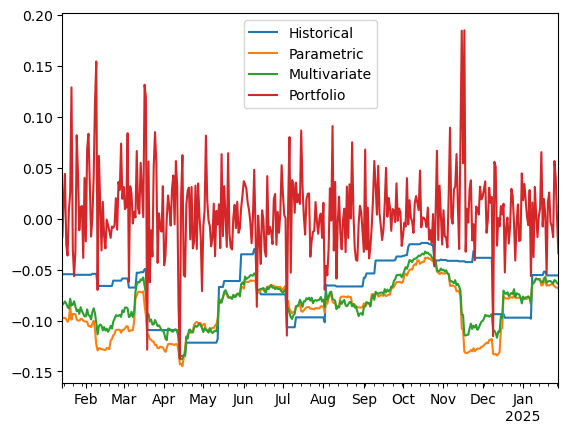

In [123]:
var_data.plot()

<Axes: >

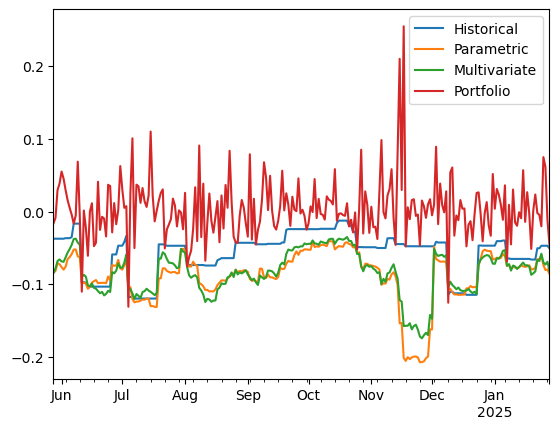

In [124]:
current_var_data.plot()

In [125]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.023622,0.010499,0.015748
Kupiec Stat,6.879338,18.231105,12.701267
P-value,0.00872,0.00002,0.000365


In [126]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.065041,0.01626,0.012195
Kupiec Stat,1.074554,7.904911,10.499354
P-value,0.299919,0.00493,0.001194


# Principal Component Analysis

## Historical PCA

In [129]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.77778282, 0.07129416, 0.0566776 , 0.05231955, 0.04192587])

In [130]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

AAVEUSDT     0.016162
ADAUSDT      0.016480
ALGOUSDT     0.018780
APTUSDT      0.016892
ARBUSDT      0.018079
ATOMUSDT     0.016468
AVAXUSDT     0.018304
BCHUSDT      0.015345
BNBUSDT      0.008546
BONKUSDT     0.023174
BTCUSDT      0.009575
DEXEUSDT     0.014233
DOGEUSDT     0.017658
DOTUSDT      0.017392
ENSUSDT      0.020287
EOSUSDT      0.017455
ETCUSDT      0.015910
ETHUSDT      0.012532
FDUSDUSDT    0.000043
FETUSDT      0.022041
FILUSDT      0.018990
FLOKIUSDT    0.023216
FLOWUSDT     0.018606
GALAUSDT     0.022442
GRTUSDT      0.020973
HBARUSDT     0.018294
ICPUSDT      0.016986
IMXUSDT      0.019148
INJUSDT      0.019508
IOTAUSDT     0.019690
JASMYUSDT    0.019595
LDOUSDT      0.019497
LINKUSDT     0.016332
LTCUSDT      0.012643
MKRUSDT      0.013103
NEARUSDT     0.020823
NEOUSDT      0.018562
OMUSDT       0.010779
OPUSDT       0.018717
PEPEUSDT     0.023799
QNTUSDT      0.014503
RAYUSDT      0.018598
SANDUSDT     0.020411
SEIUSDT      0.020567
SHIBUSDT     0.017996
SOLUSDT   

<Axes: >

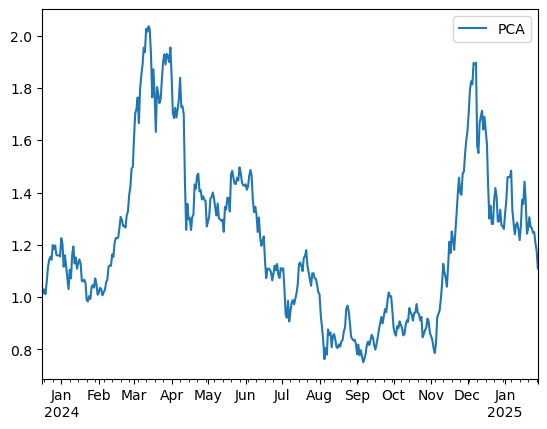

In [131]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()

<Axes: >

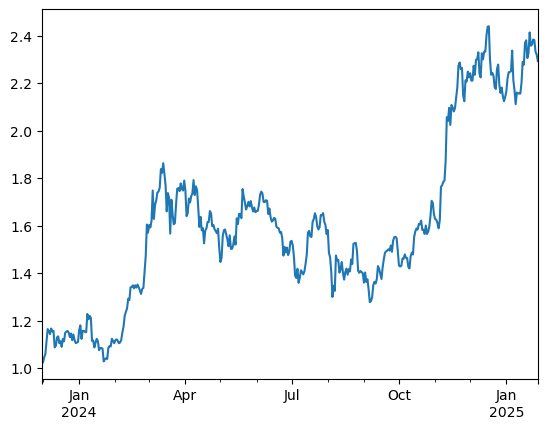

In [132]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()

In [133]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances[:20]

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
FLOWUSDT     0.424159
WBETHUSDT    0.438578
ETHUSDT      0.438942
ATOMUSDT     0.458491
DOTUSDT      0.460759
ETCUSDT      0.463004
ADAUSDT      0.501819
WBTCUSDT     0.510298
BTCUSDT      0.510649
EOSUSDT      0.522930
AVAXUSDT     0.530570
IOTAUSDT     0.548145
FILUSDT      0.552488
ARBUSDT      0.567364
GRTUSDT      0.577121
XTZUSDT      0.582536
LINKUSDT     0.596020
SOLUSDT      0.604952
IMXUSDT      0.606373
dtype: float64

<Axes: >

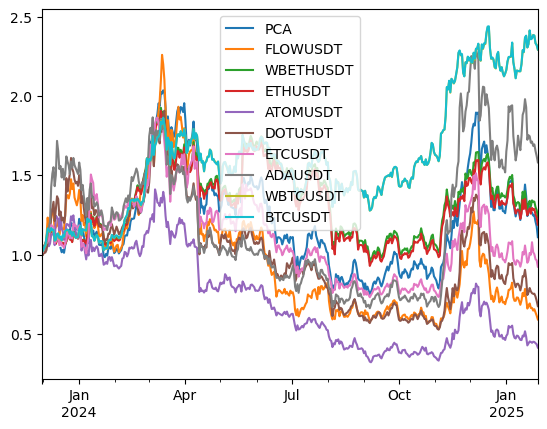

In [134]:
(1+comparison[distances.index[:10]]).cumprod().plot()

<Axes: >

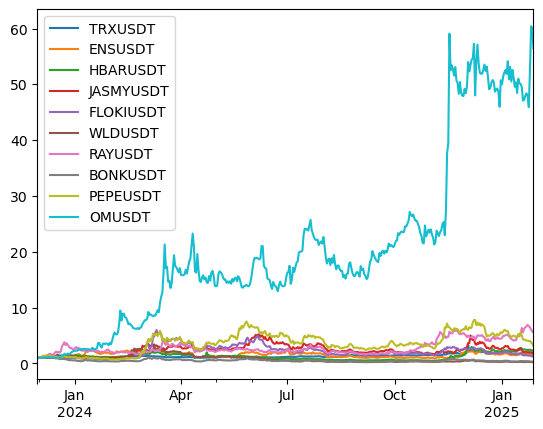

In [135]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [137]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.55910119, 0.14650535, 0.12420353, 0.09895125, 0.07123868])

In [138]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

OMUSDT       0.092266
BTCUSDT      0.060931
SOLUSDT      0.098809
JASMYUSDT    0.173116
ETHUSDT      0.084829
TRXUSDT      0.054501
BBUSDT       0.209411
BNBUSDT      0.065835
PEPEUSDT     0.160302
Name: PC1, dtype: float64

<Axes: >

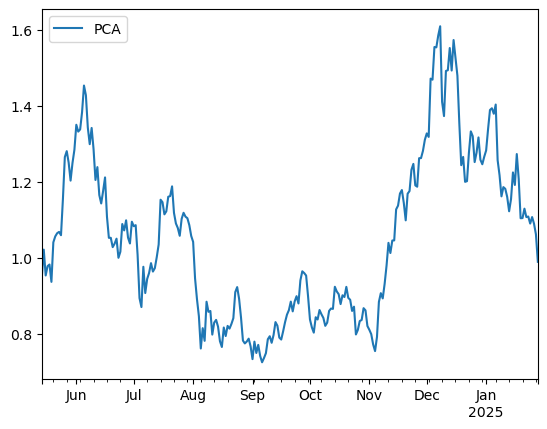

In [139]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA).cumprod().plot()

<Axes: >

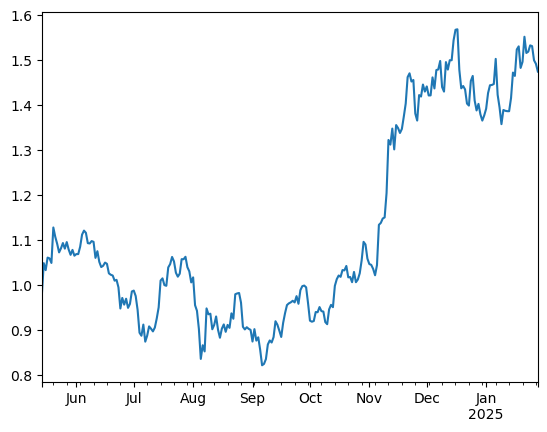

In [140]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()

In [141]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
ETHUSDT      0.424717
BNBUSDT      0.452287
BTCUSDT      0.468093
SOLUSDT      0.480846
JASMYUSDT    0.673632
PEPEUSDT     0.734156
BBUSDT       0.762236
TRXUSDT      0.898197
OMUSDT       0.950354
dtype: float64

<Axes: >

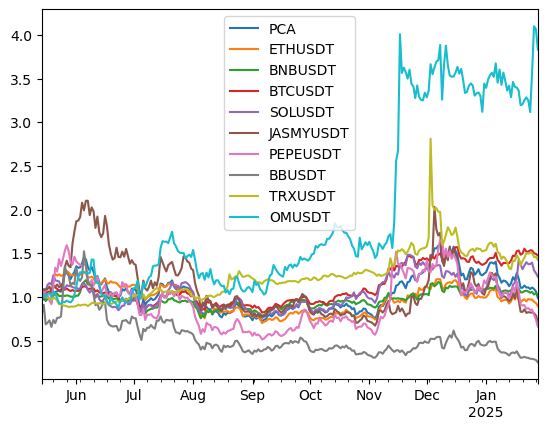

In [142]:
(1+comparison[distances.index[:10]]).cumprod().plot()

## Sensitivity Analysis

In [144]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT     1.904719
BBUSDT       1.555483
JASMYUSDT    1.317569
SOLUSDT      1.157324
BTCUSDT      1.000000
ETHUSDT      0.969693
OMUSDT       0.862380
BNBUSDT      0.660163
TRXUSDT      0.317975
Name: BTCUSDT, dtype: float64

In [145]:
days=30
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

JASMYUSDT    2.152252
PEPEUSDT     2.047833
BBUSDT       1.853774
SOLUSDT      1.341767
ETHUSDT      1.166252
TRXUSDT      1.069864
BTCUSDT      1.000000
BNBUSDT      0.588975
OMUSDT       0.581090
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [147]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [148]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
JASMYUSDT,0.244386
BNBUSDT,0.243701
ETHUSDT,0.199799
BBUSDT,0.180581
BTCUSDT,0.161815
SOLUSDT,0.127536
PEPEUSDT,0.037693
TRXUSDT,0.037130
OMUSDT,-0.026722


### Regression to PCA

In [150]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-15:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

0.718999116275316

In [151]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.284283
BNBUSDT      1.167699
ETHUSDT      1.010538
PCA          1.000000
SOLUSDT      0.738639
JASMYUSDT    0.438182
PEPEUSDT     0.405154
BBUSDT       0.375016
TRXUSDT      0.245011
OMUSDT       0.235011
dtype: float64

In [152]:
reg=ex_ante_perf.copy().dropna().iloc[-15:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BNBUSDT      2.041143
BTCUSDT      1.843895
ETHUSDT      1.166862
TRXUSDT      1.102143
PCA          1.000000
BBUSDT       0.763653
PEPEUSDT     0.634207
JASMYUSDT    0.580095
SOLUSDT      0.206767
OMUSDT       0.152104
dtype: float64

### Correlation Matrix

<Axes: >

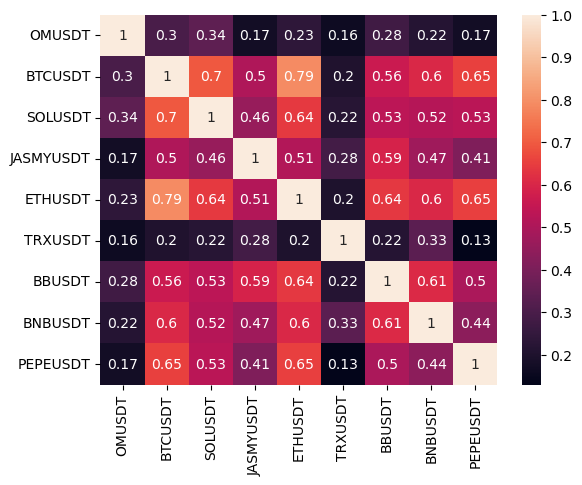

In [154]:
sns.heatmap(ex_ante_perf.corr(),annot=True)

<Axes: >

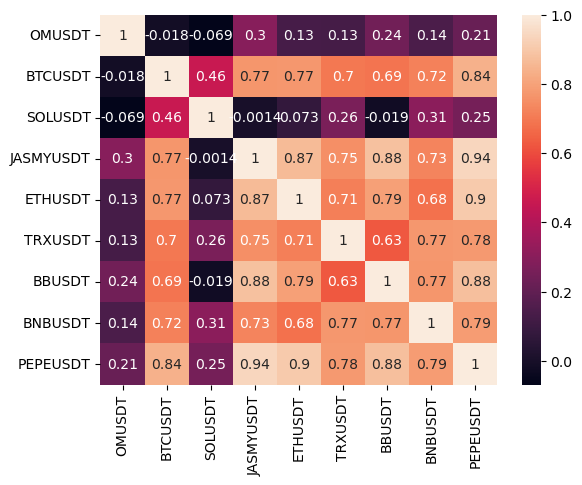

In [155]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

## Sliding window optimization

In [157]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,OMUSDT,BTCUSDT,SOLUSDT,JASMYUSDT,ETHUSDT,TRXUSDT,BBUSDT,BNBUSDT,PEPEUSDT
2024-05-27,0.000000,0.000000,0.000000,0.621968,0.000000,0.000000,0.000000,0.000000,0.378032
2024-06-10,0.625939,0.000000,0.000000,0.150852,0.000000,0.223209,0.000000,0.000000,0.000000
2024-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-07-08,0.182528,0.000000,0.000000,0.000000,0.000000,0.817472,0.000000,0.000000,0.000000
2024-07-22,0.133242,0.414563,0.112009,0.000000,0.000000,0.340186,0.000000,0.000000,0.000000
2024-08-05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.926694,0.000000,0.073306,0.000000
2024-09-02,0.435138,0.000000,0.000000,0.000000,0.000000,0.564862,0.000000,0.000000,0.000000
2024-09-16,0.287440,0.000000,0.000000,0.000000,0.000000,0.000000,0.712560,0.000000,0.000000
2024-09-30,0.176666,0.000000,0.000000,0.000000,0.165949,0.527049,0.000000,0.000000,0.130336


In [158]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0]

for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBETHUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT,XTZUSDT
2024-06-22,0.003767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012883,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-07-22,0.003767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.495684,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.064646,0.0
2024-08-21,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-09-20,0.003767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-10-20,0.003767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.134453,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-11-19,0.003767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.186002,0.170715,0.0
2024-12-19,0.546693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.337652,0.0
2025-01-18,0.003767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.521315,0.0
2025-01-28,0.003767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [159]:
rolling_optimization.iloc[-1].sort_values(ascending=False)[:6]

DEXEUSDT    0.565393
OMUSDT      0.430840
AAVEUSDT    0.003767
SOLUSDT     0.000000
LTCUSDT     0.000000
MKRUSDT     0.000000
Name: 2025-01-28 00:00:00, dtype: float64